In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import scipy.stats
import re

In [3]:
df = pandas.read_csv("adftld.csv")

In [4]:
real_struct = (df["rs_seed"] == 0).as_matrix()
weighted = ~(df["method"].isin(["zero_tfphammers", "zero_tfphammers_narrow",
                                "unweighted_tfphammers", "unweighted_tfphammers_narrow"])).as_matrix()

In [87]:
narcs = df[["min_narcs0", "min_narcs1"]].as_matrix()

In [55]:
mean_narcs = narcs.mean(axis=1)
min_narcs = narcs.min(axis=1)
max_narcs = narcs.max(axis=1)
diff_narcs = np.abs(narcs[:, 0] - narcs[:, 1])
mean_acc = df["mean_accuracy"].as_matrix()
peak_acc = df["peak_accuracy"].as_matrix()

In [7]:
print("mean:", scipy.stats.pearsonr(mean_narcs, mean_acc))
print("min:", scipy.stats.pearsonr(min_narcs, mean_acc))
print("max:", scipy.stats.pearsonr(max_narcs, mean_acc))

mean: (0.59383441122001224, 4.0520731977696081e-59)
min: (0.57694668534142179, 3.7367064433450935e-55)
max: (0.60701666798094722, 2.2171974789251559e-62)


In [8]:
print("mean:", scipy.stats.pearsonr(mean_narcs, peak_acc))
print("min:", scipy.stats.pearsonr(min_narcs, peak_acc))
print("max:", scipy.stats.pearsonr(max_narcs, peak_acc))

mean: (0.22478235093419399, 2.1630179282954251e-08)
min: (0.20085356844948676, 6.0618908916162684e-07)
max: (0.24683987793361165, 7.0665761640039325e-10)


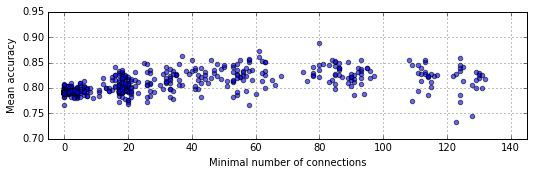

In [9]:
figsize(15 * 0.5, 5 * 0.5)
scatter(min_narcs, mean_acc, alpha=0.6)
xlabel("Minimal number of connections")
ylabel("Mean accuracy")
xlim(-5, 145)
grid()
tight_layout()
savefig("/tmp/nc_meanacc.pdf")

In [10]:
target_peak = df[df.method.isin(["unweighted_tfphammers", "unweighted_tfphammers_narrow"])].peak_accuracy.iloc[0]
target_peak

0.84507042253499998

In [11]:
x = df[weighted & real_struct].peak_accuracy >= target_peak
np.sum(x) / len(x)

0.65454545454545454

In [12]:
x = df[weighted & ~real_struct].peak_accuracy >= target_peak
np.sum(x) / len(x)

0.49090909090909091

In [5]:
method_classes = unique([s.split("_", 1)[1] for s in df.method])
method_regexes = [re.compile("(exp|pow)[0-9.]+_" + s) for s in method_classes]

In [6]:
best_in_class = {}
best_mean_acc = {}
rand_mean_acc = {}
for cls, regex in zip(method_classes, method_regexes):
    matched = df.method.str.match(regex, as_indexer=True)
    i = df[matched & real_struct].mean_accuracy.argmax()
    row = df.ix[i]
    m = row.method
    best_mean_acc[m] = row.mean_accuracy
    rand_mean_acc[m] = df[(df.method == m) & ~real_struct].mean_accuracy.as_matrix()

/home/michael/py3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [7]:
for cls in best_mean_acc.keys():
    rand_min = rand_mean_acc[cls].min()
    rand_max = rand_mean_acc[cls].max()
    rand_mean = mean(rand_mean_acc[cls])
    rand_std = std(rand_mean_acc[cls])
    best = best_mean_acc[cls]
    print(cls, rand_min, rand_mean, "±", rand_std, rand_max, "/", best, 1 - scipy.stats.norm.cdf(best, loc=rand_mean, scale=rand_std))

exp0.1_diff_normsc_tfphammers 0.781690140845 0.815971830986 ± 0.0172223288031 0.838028169014 / 0.841971830986 0.0655640704598
exp0.01_tfphammers 0.766478873239 0.819436619718 ± 0.0253694776212 0.854507042254 / 0.872253521127 0.0186754675802
exp0.05_normsc_tfphammers 0.785915492958 0.818422535211 ± 0.0224257729984 0.851971830986 / 0.855492957746 0.0491626195789
pow3_fa_tfphammers 0.782957746479 0.828535211268 ± 0.0196304076924 0.855915492958 / 0.861126760563 0.0484312401763
exp0.1_diff_fa_tfphammers 0.773098591549 0.803197183099 ± 0.0188065934911 0.832535211268 / 0.848309859155 0.00822514124907


In [68]:
df[~weighted]

,problem,method,fold_seed,rs_seed,min_narcs0,min_narcs1,peak_accuracy,mean_accuracy,mean_accuracy_rank
55,adftld,zero_tfphammers,0,0,0,0,0.816901,0.789718,0
177,adftld,unweighted_tfphammers,0,0,0,0,0.845070,0.767183,0
